# Lab 2 Report: Simulation of R-C Amplifier circuit (Continuous System)



# Submitted by:
## Name: Kshitiz Poudel
## Roll : THA076BCT018
##Experiment No:2

### AIM:
To simulate the R-C amplifier circuit and develop mathematical modeling for a continuous system.

## OBJECTIVES:
    i)Develop the mathematical model of the continuous system.
    ii)Determine the state of the system by evaluating the values of voltage in input and output of the amplifier circuit

## THEORY:

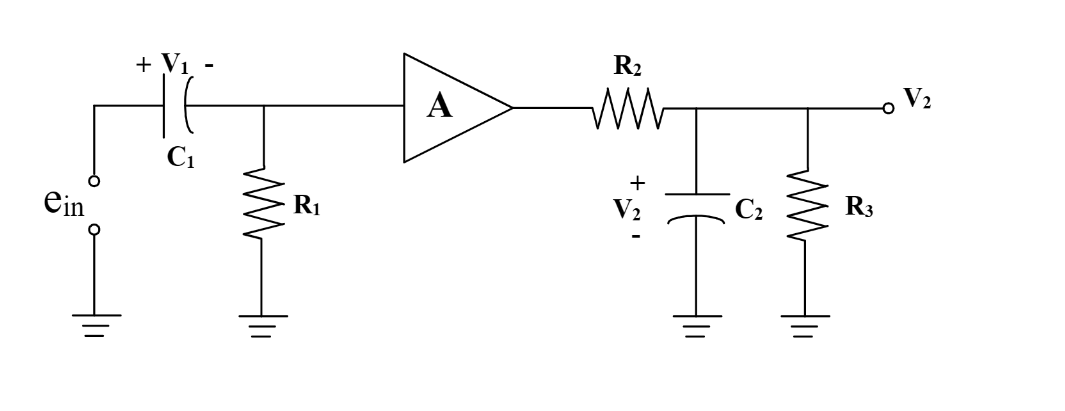

# R-C Amplifier Circuit

We use the R-C amplifier circuit, which is a continuous system. The system can be described by the following two differential equations:

Applying Kirchoffs current law on the input side,<br>

$$\frac{{dV_1}}{{dt}} = \frac{{ein - V}}{{R1}} \quad (1)$$
$$\frac{{dV_1}}{{dt}} = \frac{{ein - V}}{{R1C1}} \quad (2)$$
<br><br>
Similarly on the output side,<br>
$$\frac{{dV_2}}{{dt}} = \frac{{A}}{{R2}} \left(ein - V_1\right) - \frac{{V_2(R2 + R3)}}{{R2R3}} \quad (3)$$

We can write these equations in more simpler form my  regrouping and renaming the constants

$$\frac{{dV_1}}{{dt}} = A_{11} \cdot V_1 + B_1 \cdot ein \quad (4)$$
$$\frac{{dV_2}}{{dt}} = A_{21} \cdot V_1 + A_{22} \cdot V_2 + B_2 \cdot ein \quad (5)$$

Where,
$$A_{11} = -\frac{1}{{R1C1}} = -B_1$$
$$A_{21} = -\frac{A}{{R2C2}} = -B_2$$
$$A_{22} = -\frac{{R2 + R3}}{{R2R3C2}}$$



Equations (4) and (5) are first order ordinary differntial equations (ODEs). solving them analytically would give us the exact solution or values of V1 and V2 at any instant of time. But we can solve them numerically using approximations specifically the RK-4 method 

# Overview of RK-4 Method

The Runge-Kutta 4 (RK-4) method is an improvement of the RK-2 or Modified Euler's method to solve first-order Ordinary Differential Equations (ODEs). To understand better, we can first refer to Euler's method.




# Euler's Method
Euler's method is the most basic explicit method for numerical integration of ordinary differential equations. It approximates the value of y at point `y1` with the slope  tangent of the function `y` given by dunction `f(x,y)` itself.<br>


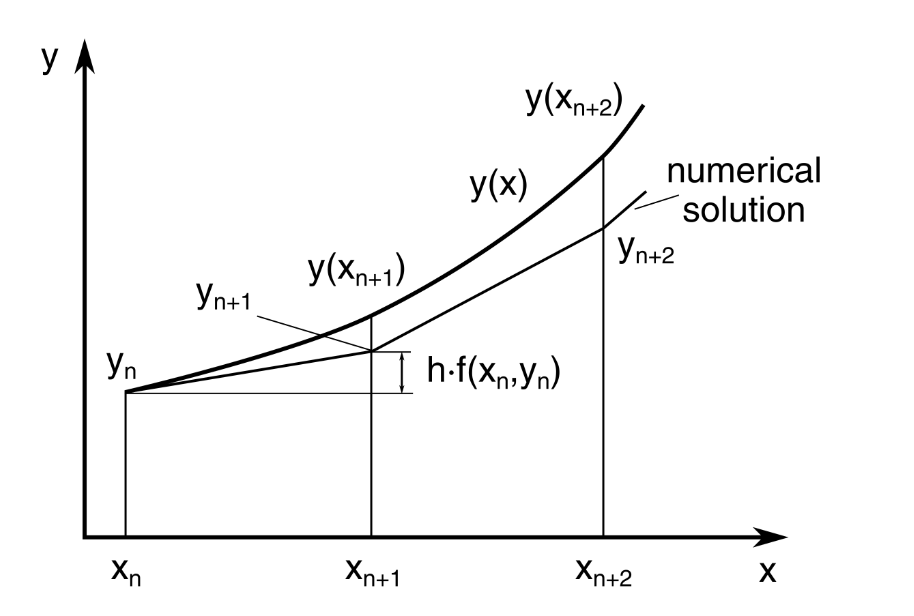<br><br>

$$y_{n+1} = y_n + hf(x_n, y_n)$$

where `h` is the step size, `f(x_n, y_n)` is the derivative at the point `(x_n, y_n)`, and `y_{n+1}` is the next value to be calculated.

# Modified Euler's Method (RK-2)
The Modified Euler's Method, is the Improved Euler's Method 
 It is an improvement on the basic Euler's method and provides more accurate results. Instead of using value of slope at single point , it averages the slope at 2 points y0 and y1. but since y1 is not yet calculated it uses the euler's equation as an approximation to calculate y1 and then use it again to calculate the slope at that point. finally the more accurate value of y1 is approximated by averaging those slopes. `k_1` and `k_2` represent the equivalent change in `y` .
 <br><br>
 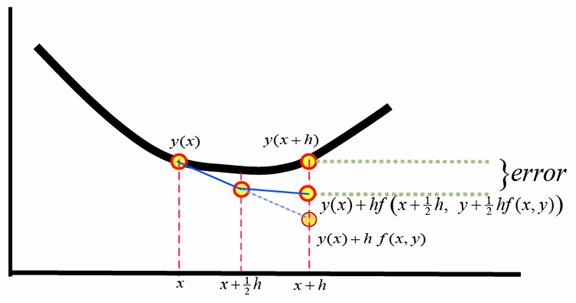
 <br>
 <br>
 The formula for the Modified Euler's method is:

$$
\begin{align*}
k_1 &= hf(x_n, y_n) \\
k_2 &= hf(x_n + h, y_n + k_1) \\
y_{n+1} &= y_n + 0.5(k_1 + k_2)
\end{align*}
$$



# RK-4 Method
RK-4 method takes the concept a step further . instead of calculating derivative at single or 2 points it calculates it at 4 points between the subinterval.the four points lie once at each end and twice at the midpoint of the interval. The RK-4 method although has more steps essentailly uses the same concept where approximation from previous calculation is used to improve next calculation . and finally just the weighted sum of derivatives.
<br><br>
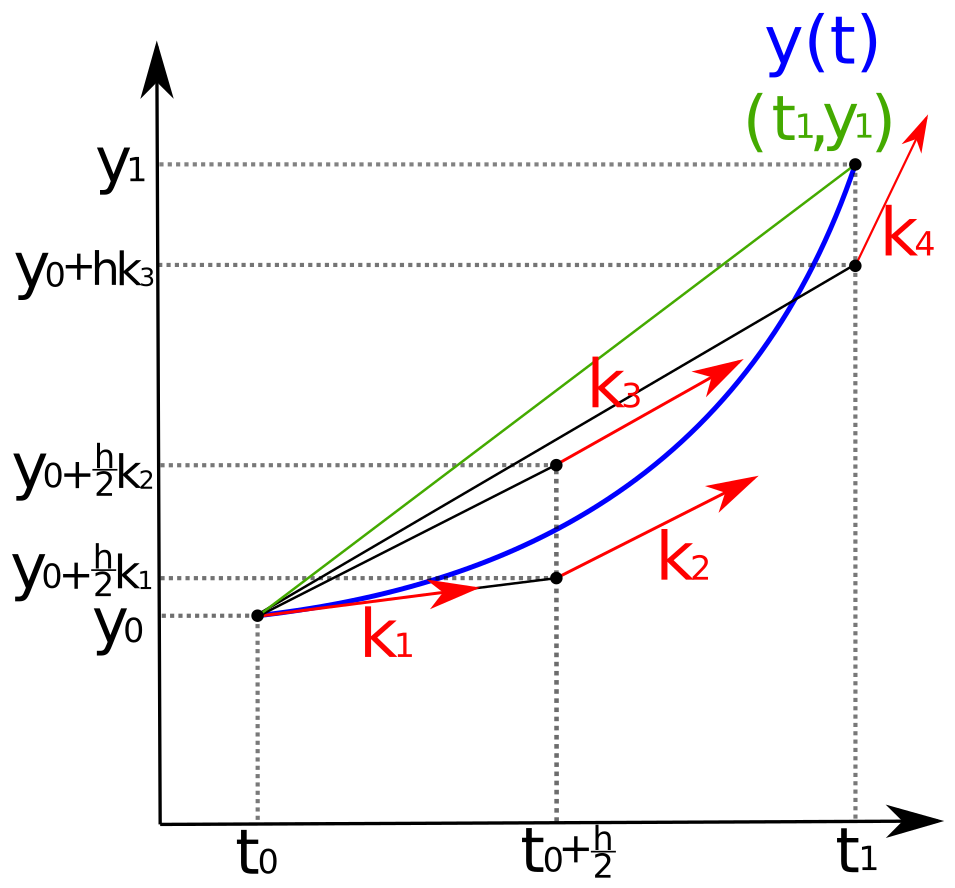
<br>
<br>
formula for the fourth-order Runge-Kutta method is:

$$
\begin{align*}
k_1 &= hf(x_n, y_n) \\
k_2 &= hf(x_n + 0.5h, y_n + 0.5k_1) \\
k_3 &= hf(x_n + 0.5h, y_n + 0.5k_2) \\
k_4 &= hf(x_n + h, y_n + k_3) \\
y_{n+1} &= y_n + 1/6(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$


These methods are used to solve first-order ODEs, and they provide the approximate value of `y` for a given point `x`. The RK-4 method is often preferred due to its higher accuracy compared to the Euler's and Modified Euler's methods.


for Initial Condition, we use<br> 
For t = 0, V 1 = 0 and V 2 = 0.<br>
h = 0.0002 and ein = 1.5 V (t ≥ 0, ein = 0 V (t < 0) n = 500 data points)<br>
A11 = −50 sec−1<br>
A21 = −10000 sec−1<br>
A22 = −21.5 sec−1<br>

In [38]:
#Libraries used

# Numpy : for initializing array of arbritary size
# Matplotlip : for plotting array of values for V1 and V2 against time 

#Functions used

#function1: defines RHS for equation 4
#function2 : defines RHS for equation 5

## Discussion(Code) ##

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# define functions in the RHS of differential equations
def function1(a11, v10, ein):
    return a11 * v10 - a11 * ein

def function2(a21, a22, v10, v20, ein):
    return a21 * v10 + a22 * v20 - a21 * ein

In [41]:
# Initial values
a11 = -50
a21 = -19000
a22 = -21.5
ein = 1.5

v10 = 0.0
v20 = 0.0

h = 0.0002

In [42]:
no_of_data_points=500

t = np.zeros(no_of_data_points)
v1 = np.zeros(no_of_data_points)
v2 = np.zeros(no_of_data_points)

for i in range(no_of_data_points):

    m11 = function1(a11, v10, ein) # m=k/h
    m12 = function1(a11, v10 + m11 * h / 2, ein)
    m13 = function1(a11, v10 + m12 * h / 2, ein)
    m14 = function1(a11, v10 + m13 * h, ein)
    v11 = v10 + ((m11 + 2 * m12 + 2 * m13 + m14) / 6) * h
    m21 = function2(a21, a22, v10, v20, ein)
    m22 = function2(a21, a22, v10 + h / 2, v20 + m21 * h / 2, ein)
    m23 = function2(a21, a22, v10 + h / 2, v20 + m22 * h / 2, ein)
    m24 = function2(a21, a22, v10 + h, v20 + m23 * h, ein)
    v21 = v20 + ((m21 + 2 * m22 + 2 * m23 + m24) / 6) * h

    v10 = v11
    v20 = v21
    
    t[i] = h * i
    v1[i] = v10
    v2[i] = v20




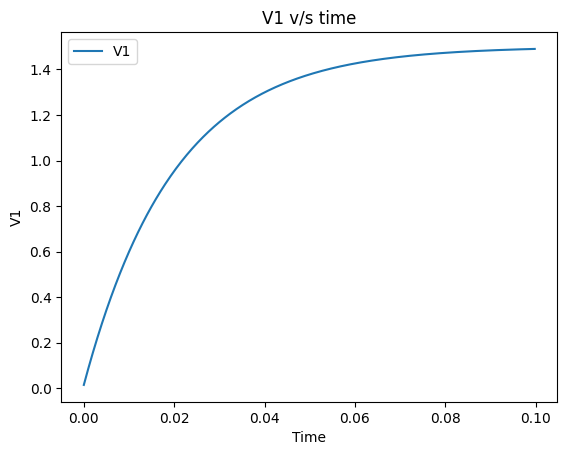

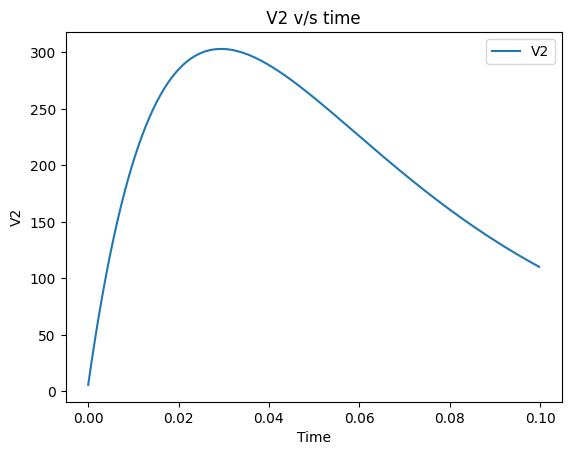

In [43]:
plt.figure(1)
plt.plot(t, v1, label='V1')
plt.title('V1 v/s time')
plt.xlabel('Time')
plt.ylabel('V1')
plt.legend()

plt.figure(2)
plt.plot(t, v2, label='V2')
plt.title(' V2 v/s time ')
plt.xlabel('Time')
plt.ylabel('V2')
plt.legend()

plt.show()

## RESULTS:
The value of voltage at the capacitor in the input side gradually kept on increasing while voltage at the output side increased first and after some time again started decreasing.
<br>
<br>
The increasing curve for V1 up to a saturation point represents the charging of the capacitor C1 in the circuit. Initially, when the input voltage is applied, the capacitor C1 starts charging through the resistor R1. As it charges, the voltage across it (V1) increases. However, a capacitor cannot charge beyond the voltage of the source (in this case, the input voltage)
<br>

Initially, V2 increases as the first capacitor C1 charges and the voltage drop across R2 increases. However, as C1 approaches its saturation point, the rate of change of voltage across it (and hence across R2) decreases. This decreasing rate of change is coupled to the second stage through C2. The decreasing voltage across R2 causes the capacitor C2 to start discharging through R3, which results in the decrease of V2

## Conclusion :
The simulation of R-C amplifier circuit was completed  and behaviour of voltage at input and output side were observed successfully. 